# **ОПРЕДЕЛЕНИЕ ОТТОКА КЛИЕНТОВ БАНКА**

<center> <img src = https://i2.wp.com/miro.medium.com/0*VTMnppFqGtMBm1KO.png alt="drawing" style="width: 800px; height:400px;">

In [1]:
# Импорт основных библиотек
import numpy as np
import pandas as pd

In [2]:
# Импорт библиотек построения графиков и диаграмм
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import os

In [3]:
# Загрузка исходных данных
churn_data = pd.read_csv('data/churn.csv')

In [4]:
# Вывод фрагмента загруженных данных
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


У нас всего 14 признаков: 7 числовых и 7 категориальных.

Признаки таблицы:
- `RowNumber` — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- `CustomerId` — идентификатор клиента
- `Surname` — фамилия клиента
- `CreditScore` — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- `Geography` — страна клиента (банк международный)
- `Gender` — пол клиента
- `Age` — возраст клиента
- `Tenure` — сколько лет клиент пользуется услугами банка
- `Balance` — баланс на счетах клиента в банке
- `NumOfProducts` — количество услуг банка, которые приобрёл клиент
- `HasCrCard` — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- `IsActiveMember` — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- `EstimatedSalary` — предполагаемая заработная плата клиента
- `Exited` — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Признак _RowNumber_ можно удалить из таблицы, т.к. это лишняя информация. Выведем первые пять строк таблицы и убедимся, что всё прошло успешно.

In [5]:
# Удаление признака "RowNumber" из датасета
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Вывод названий признаков
churn_data.columns.to_list()

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [7]:
# Вывод информации о столбцах 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
# Информация о пропущенных данных
churn_data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Основные статистические показатели для числовых данных
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Основные статистические показатели для строковых данных
churn_data.describe(include=object)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# ЗАДАНИЯ

## 9.1.
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [11]:
fig = px.pie(
    data_frame=churn_data,
    names='Exited',
    height=500,
    width=800,
    title='Соотношение ушедших и лояльных клиентов',
    hole=0.3
    )
if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig9.1.png")
fig.show();

Из графика видно, что порядка 20% клиентов от общего числа по тем или иным причинам покидают банк.

<center> <img src = ?raw=true alt="drawing" style="width:800px;">

## 9.2.
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

<Axes: title={'center': 'Распределение баланса пользователей, у которых на счету больше 2.500$'}, ylabel='Frequency'>

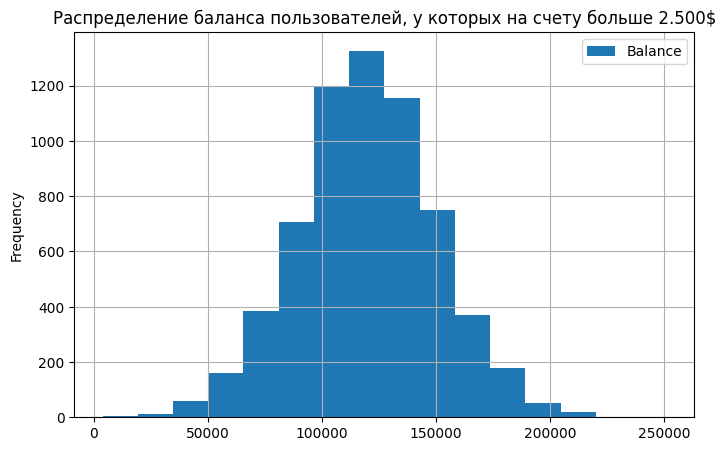

In [12]:
filtered_by_balance = churn_data[churn_data['Balance'] > 2500]
filtered_by_balance.plot(
    x='Exited',
    y='Balance',
    kind='hist',
    figsize=(8, 5),
    title='Распределение баланса пользователей, у которых на счету больше 2.500$',
    grid = True,
    bins=16
    )

Из графика видно, что:
1. у основной массы клиентов на счету от 70000 до 170000 $;
2. у менее чем 200 человек меньше 70000$ или более 170000$;
3. у 1300 клиентов на счету порядка  125000$. 

In [13]:
fig = px.histogram(
    data_frame= churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    color = "Exited",
    nbins=15,
    title='Распределение баланса пользователей, у которых на счету больше 2.500$',
    width=800,
    height=500,
    marginal='box',
    histnorm='percent'
)
if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig9.2.png")
fig.show();

## 9.3.
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [14]:
fig = px.histogram(
    data_frame= churn_data,
    x='Balance',
    color = "Exited",
    nbins=15,
    title='Гистограмма распределения баланса в зависимости от лояльности клиента',
    width=800,
    height=500,
    marginal='box',
    histnorm='percent'
)
if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig9.3.png")
fig.show();

Из графика видно, что:
1. У ушедших клиентов суммы на счетах меньше, чем у лояльных клиентов;
2. Ушедшие клиенты меньше рискуют закрывая счёт в банке (т.к. у них в среднем меньше суммы, чем у лояльных клиентов). В этой связи, на мой взгляд, возможно выделить 2 варианта, почему ушедшие клиенты снимают деньги:
    а) либо они хотят вложить свои средства в более ликвидные инструменты для инвестиций;
    б) либо им просто не хватает средств для текущих расходов.
3. В дальнейшем, при анализе данных, уточним эти выводы.


## 9.4.
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [15]:
fig = px.histogram(
    data_frame= churn_data,
    x='Age',
    color = "Exited",
    nbins=15,
    title='Гистограмма распределения возраста в зависимости от лояльности клиента',
    width=800,
    height=500,
    marginal='box',
    histnorm='percent'
)
if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig9.4.png")
fig.show();

Из графика видно:
1. наибольшие выбросы у более возрастных клиентов;
2. медианный возраст лояльных клиентов (36 лет), значительно ниже медианного возраста ушедших клиентов (45 лет);
3. 

## 9.5.
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [16]:
salary_score_data = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
fig = px.scatter(
    data_frame = salary_score_data,
    x = 'EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=500,
    width=800,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig9.5.png")
fig.show();

Из графика явно не видно связи между кредитным рейтингом, предполагаемой заработной платой и отттоком клиентов.

## 9.6.
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [17]:
gender_counts = churn_data['Gender'].value_counts() 
display(gender_counts)

# 1-й уровень, центр диаграммы
labels = ["Всего клиентов: "]
parents = [""]
values = [sum(gender_counts)]

# 2-й уровень, "лепестки" диаграммы
labels += gender_counts.index.tolist()
parents += [labels[0]]*len(gender_counts)
values += gender_counts.tolist()
exited_male = churn_data[churn_data['Gender'] == 'Male']['Exited'].value_counts()
exited_female = churn_data[churn_data['Gender'] == 'Female']['Exited'].value_counts()

display(exited_female)
display(exited_male)

#3-ий уровень
labels += exited_male.index.tolist()
parents += ['Male', 'Male']
values += exited_male.tolist()

display(labels)
display(parents)
display(values)

labels += exited_female.tolist()
parents += ['Female', 'Female']
values += exited_female.tolist()

display(labels)
display(parents)
display(values)


fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values=values,
    textinfo='label+value+percent entry',
    branchvalues="total",
))

fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig9.6.png")
fig.show();

Male      5457
Female    4543
Name: Gender, dtype: int64

0    3404
1    1139
Name: Exited, dtype: int64

0    4559
1     898
Name: Exited, dtype: int64

['Всего клиентов: ', 'Male', 'Female', 0, 1]

['', 'Всего клиентов: ', 'Всего клиентов: ', 'Male', 'Male']

[10000, 5457, 4543, 4559, 898]

['Всего клиентов: ', 'Male', 'Female', 0, 1, 3404, 1139]

['',
 'Всего клиентов: ',
 'Всего клиентов: ',
 'Male',
 'Male',
 'Female',
 'Female']

[10000, 5457, 4543, 4559, 898, 3404, 1139]

Из графика видно, что чаще банк покидают женщины (11%), чем мужчины (9%).

## 9.7.
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

C:\Users\Alex\AppData\Local\Temp\ipykernel_9180\169408449.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



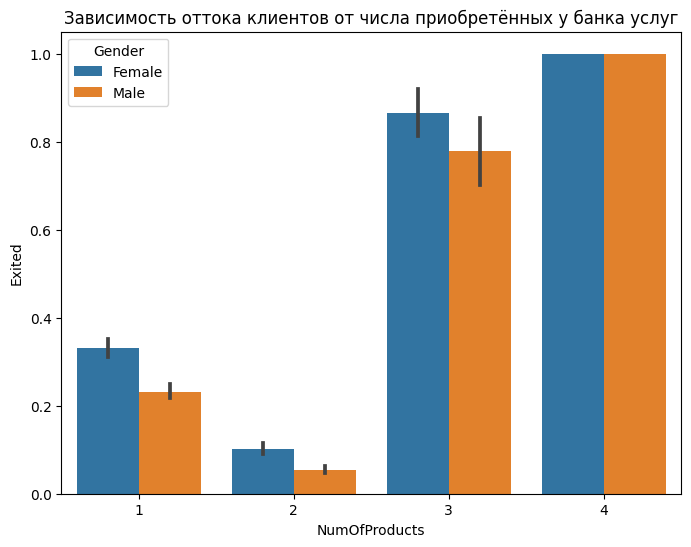

In [18]:
fig = plt.figure(figsize=(8, 6))
barplot = sns.barplot (data =churn_data,
             x ="NumOfProducts",
             y ="Exited",
             hue ="Gender"
             )
barplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг')

fig.show();

Из диаграммы можно сделать следующие выводы:
1. Число приобретённых у банка услуг практически влияет на отток клиентов. Чем больше приобретённых услуг у клиента, тем выше отток.
2. При этом у мужчин отток ниже, чем уженщин.

## 9.8.
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

C:\Users\Alex\AppData\Local\Temp\ipykernel_9180\2260783907.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



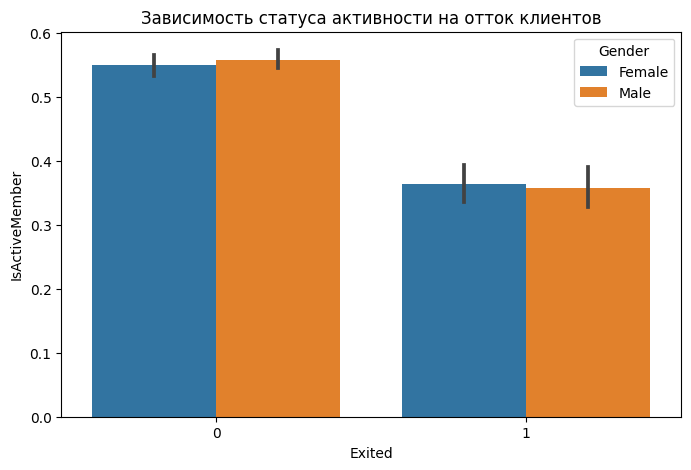

In [19]:
fig = plt.figure(figsize=(8, 5))
barplot = sns.barplot (data =churn_data,
             x ="Exited",
             y ="IsActiveMember",
             hue ="Gender"
             )
barplot.set_title('Зависимость статуса активности на отток клиентов')

fig.show();

Из диаграммы можно сделать следующие выводы:
1. Активные клинты наиболее лояльны банку;
2. Менее активные клиенты чаще покидают банк;
3. Гендерный признак не влияет на активность клиента;
4. Возможно необходимо расширить программу мотивации клиентов, чтобы повысить их в активность.

## 9.9.
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [20]:
strana = churn_data.groupby(['Geography'], as_index=False).agg('mean')

fig = px.choropleth(
    data_frame=strana, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    hover_name='Geography',
    range_color=[0, 0.4], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma #палитра цветов
)

#отображаем график
if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig9.9.png")
fig.show();

C:\Users\Alex\AppData\Local\Temp\ipykernel_9180\1083218877.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Из тепловой картограммы видно, что:
1. Наибольшее число ушедших клиентов в Германии;
2. Возможно это связано с меньшим представительством банка в Германии.

## 9.10.
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества')

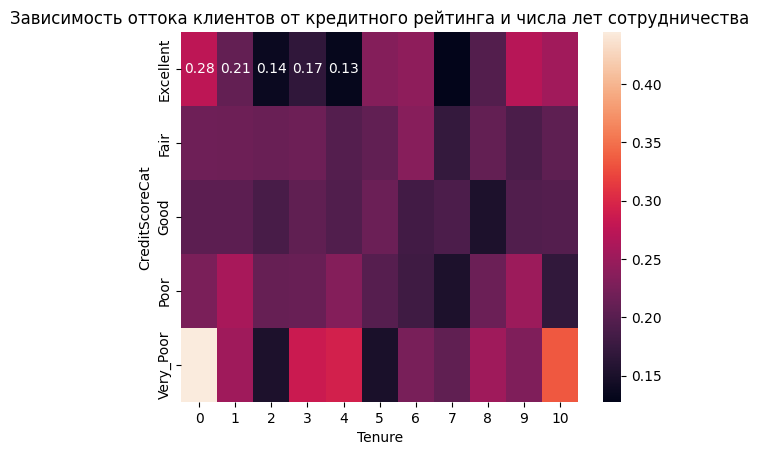

In [21]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества')

Из тепловой карты можно сделать следующие выводы:
1. Чаще других уходят клиенты с низким кредитным рейтингом (Very_Poor) и в тоже время недавно пользующиеся услугами банка (до 1 года);
2. Также довольно часто уходят клиенты с низким кредитным рейтингом (Very_Poor) и в тоже время давно пользующиеся услугами банка (более 9 лет).